In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import os
import PIL

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
path="../cat-dogs-data-np/"
size=224

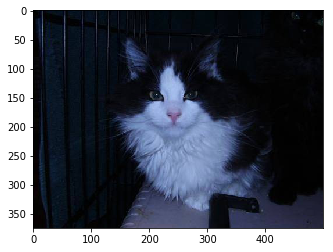

In [4]:
cats=os.listdir(f'{path}valid/cat')
dogs=os.listdir(f'{path}valid/dog')
valid_img=cats+dogs
plt.imshow(plt.imread(f'{path}valid/cat/{cats[0]}'))

In [5]:
arch=resnet34
data=ImageClassifierData.from_paths(path,tfms=tfms_from_model(arch,size))
learn=ConvLearner.pretrained(arch,data,precompute=True)
learn.fit(0.01,3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[0.      0.16882 0.03948 0.98828]                          
[1.      0.08918 0.03309 0.98633]                           
[2.      0.06698 0.0316  0.9873 ]                           



In [93]:
log_pred=learn.predict()
log_pred.shape

(989, 2)

In [94]:
pred=np.argmax(log_pred,axis=1)
probs=np.exp(log_pred)

In [8]:
def wrt_ans(value):
    return np.where(np.equal(pred,data.val_y)==value)[0]

In [9]:
def cat_dog(kind,value):
    arr1=wrt_ans(value)
    common=[]
    arr2=np.where(data.val_y==kind)[0]
    c1=0
    c2=0
    while(c1<len(arr1) and c2<len(arr2)):
        if(arr1[c1]>arr2[c2]):
            c2+=1
        elif(arr1[c1]<arr2[c2]):
            c1+=1
        else:
            common.append(arr1[c1])
            c1+=1
            c2+=1   
    return np.array(common)

In [10]:
cat_dog(1,False)

array([507, 568, 579, 611, 644, 675, 724, 813, 847])

In [100]:
def plot_img(arr,title):
    n_col=min(4,len(arr))
    imgs=(np.array(valid_img)[arr])
    f,ax=plt.subplots(1,n_col,figsize=(12,10))
    print (title)
    for i in range(n_col):
        ax[i].set_title(str(probs[arr[i],data.val_y[arr[i]]]))
        ax[i].imshow(plt.imread(f'{path}valid/{imgs[i][:3]}/{imgs[i]}'))
        ax[i].axis('off')

Dogs wrong guessed


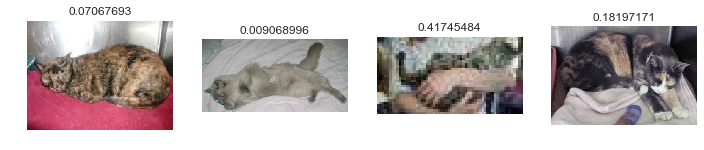

In [106]:
plot_img(cat_dog(0,False),"Dogs wrong guessed")

In [13]:
learn=ConvLearner.pretrained(arch,data,precompute=True)
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 91%|█████████ | 29/32 [00:01<00:00, 21.76it/s, loss=2.99] 


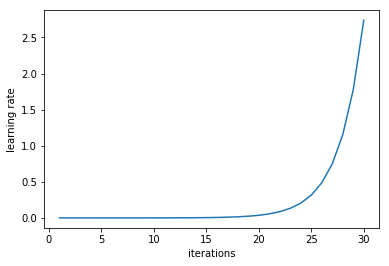

In [14]:
learn.sched.plot_lr()

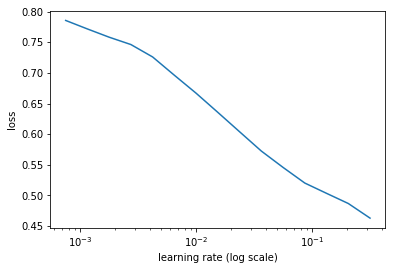

In [15]:
learn.sched.plot()

In [16]:
tfms=tfms_from_model(arch,size,aug_tfms=transforms_side_on,max_zoom=1.1)

In [43]:
def get_trns():
    data = ImageClassifierData.from_paths(path, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return (data.trn_ds.denorm(x)[0])

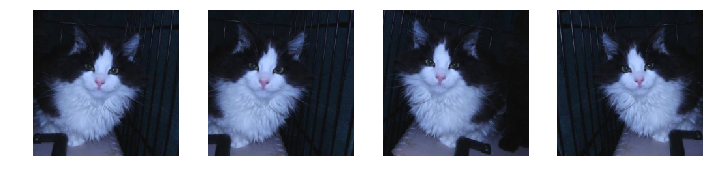

In [44]:
f,ax=plt.subplots(1,4,figsize=(12,10))
for i in range(4):
    ax[i].axis('off')
    ax[i].imshow(get_trns())

In [79]:
data=ImageClassifierData.from_paths(path,tfms=tfms)
learn=ConvLearner.pretrained(arch,data,precompute=True)
learn.fit(0.1,3,cycle_len=1,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.18736 0.05416 0.9873 ]                          
[1.      0.11281 0.05839 0.98828]                          
[2.      0.09303 0.04738 0.99121]                           
[3.      0.06624 0.03147 0.99023]                           
[4.      0.05965 0.01188 0.99316]                           
[5.      0.05572 0.01683 0.99414]                           
[6.      0.04816 0.01474 0.99414]                           



In [83]:
learn.sched.epoch

7

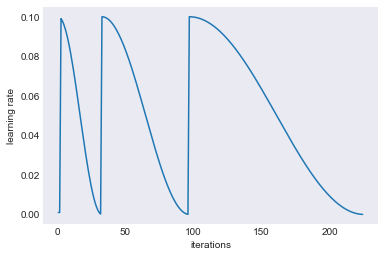

In [80]:
learn.sched.plot_lr()

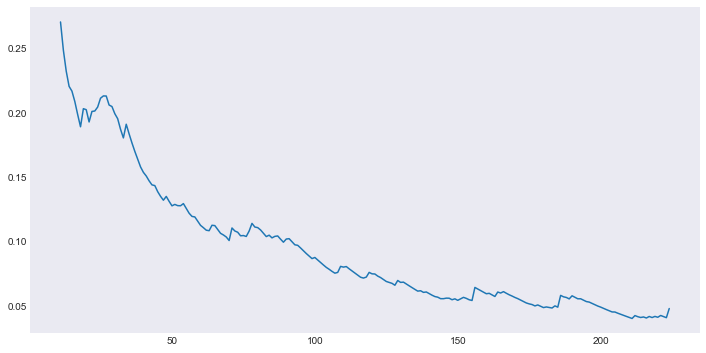

In [81]:
sns.set_style("dark")
plt.figure(figsize=(12,6))
learn.sched.plot_loss()

In [109]:
log_preds,y = learn.TTA()
preds=np.argmax(np.exp(log_preds),axis=1)

In [120]:
len(np.where(preds==y)[0])

983

In [115]:
from sklearn.metrics import confusion_matrix
res=confusion_matrix(y,preds)

[[485   4]
 [  2 498]]


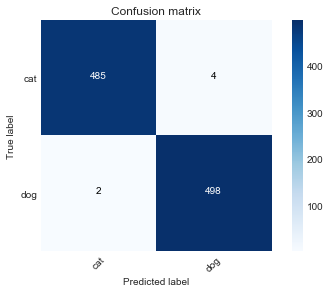

In [116]:
plot_confusion_matrix(res,data.classes)
plt.show()